In [21]:
# Import libraries
import pandas as pd
import numpy as np
import json
import umap
#import sns
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.spatial import distance_matrix
from sklearn import cluster
from collections import Counter
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

In [ ]:
# Import the matrices of GIANA encoding.
#  This is useless, I have save and load the encoding matrix in "Processed_TRA_By_GIANA", or some files like this.

# Encoding_Matrix_TRA_human = pd.read_csv('/content/drive/My Drive/GIANA/GIANA-1.2.0/VDJdb_TRA_human_GIANA--RotationEncodingBL62.txt_EncodingMatrix.txt', sep='\t', header=None)
# display(Encoding_Matrix_TRA_human)

# Encoding_Matrix_TRB_human = pd.read_csv('/content/drive/My Drive/GIANA/GIANA-1.2.0/VDJdb_TRB_human_GIANA--RotationEncodingBL62.txt_EncodingMatrix.txt', sep='\t', header=None)
# display(Encoding_Matrix_TRB_human)

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
0,CAAADNYGQNFVF,TRAV12-2*01,TRAJ26*01,QARQMVQAMRTIGTHP,InfluenzaA,-0.422125,0.122257,0.162796,0.600990,0.197342,...,0.107914,0.130335,0.342940,-0.703101,-0.132454,0.486611,0.084516,-0.699910,0.040827,-0.472049
1,CAAADNYGQNFVF,TRAV25*01,TRAJ26*01,AVFDRKSDAK,EBV,-0.422125,0.122257,0.162796,0.600990,0.197342,...,0.107914,0.130335,0.342940,-0.703101,-0.132454,0.486611,0.084516,-0.699910,0.040827,-0.472049
2,CAAAETSYDKVIF,TRAV13-1*01,TRAJ50*01,RAKFKQLL,EBV,0.408501,-0.463889,-0.397330,-0.019729,0.511896,...,0.161617,0.083978,0.091194,0.345470,-0.294153,0.298919,-0.608347,0.594359,-0.294738,0.486415
3,CAAAGAGSYQLTF,TRAV8-1*01,TRAJ28*01,KLGGALQAK,CMV,-0.312309,-0.535722,-0.019499,-0.122113,-0.709479,...,0.534093,0.548508,0.594903,0.326693,-0.453553,-0.563170,-0.554163,0.181178,-0.716009,-0.089898
4,CAAAGDNNRKLIW,TRAV13-1*01,TRAJ38*01,NLVPMVATV,CMV,0.185993,-0.440178,-0.447695,0.343410,0.446036,...,-0.335624,0.170363,0.423411,0.466816,-0.503472,-0.379369,0.149482,0.321768,0.285847,0.684699
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25817,CAVVRGISRWHQNAGGTSYGKLTF,TRAV39*01,TRAJ52*01,GILGFVFTL,InfluenzaA,0.301552,-0.064046,-0.187557,-0.537442,-0.291040,...,0.229720,0.602587,1.089717,0.552381,-1.046081,-0.566579,-1.529891,0.637558,-0.967118,0.732054
25818,CAYRSLSGKPTAMNSGGSNYKLTF,TRAV38-2/DV8*01,TRAJ53*01,RLRAEAQVK,EBV,-0.053858,-1.025117,-0.767975,0.102018,0.556228,...,0.236451,-0.146666,-1.200385,0.321851,-0.002531,0.769186,-0.119001,0.495226,-1.222027,0.046767
25819,CGRQMLLFTTVLYTKAGNNRKLIW,TRAV30*01,TRAJ38*01,KLGGALQAK,CMV,0.373396,-0.376465,-0.527653,0.751014,-0.313194,...,-0.241636,-0.343684,-1.324542,-0.016619,-0.990883,0.464504,0.970621,-0.885797,-1.029290,0.853739
25820,CAASSMSQRNFNAGGTSYGKLTF,TRAV13-1*01,TRAJ52*01,KLGGALQAK,CMV,-0.145571,-0.464259,-0.054241,0.746817,1.105179,...,0.652018,-0.400052,0.414997,0.484408,0.044307,0.371172,-1.209431,0.587467,-0.518077,0.621964


,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
0,CAASTSAVLGKKGSQETQYF,TRBV10-1*01,TRBJ2-5*01,KAFSPEVIPMF,HIV-1,-0.642721,-0.974322,-0.570437,-0.165921,-1.061089,...,0.209457,-0.446701,-0.409305,0.714212,-0.069862,0.760568,-0.496755,0.326080,-0.688467,0.076541
1,CAISECAIRGTSGLTDTQYF,TRBV10-3*01,TRBJ2-3*01,TQGYFPDWQNY,HIV-1,-0.642721,-0.974322,-0.570437,-0.165921,-1.061089,...,-0.105915,-0.568840,-1.619209,-0.018757,-0.635144,0.257190,0.991213,-1.377649,-0.460437,-0.410254
2,CAISERAIRGTSGLTDTQYF,TRBV10-3*01,TRBJ2-3*01,TQGYFPDWQNY,HIV-1,-0.642721,-0.974322,-0.570437,-0.165921,-1.061089,...,-0.105915,-0.568840,-1.619209,-0.018757,-0.635144,0.257190,0.991213,-1.377649,-0.460437,-0.410254
3,CAISESGLAGGRSNTGELFF,TRBV10-3*01,TRBJ2-2*01,KLGGALQAK,CMV,-0.462359,-0.561227,-0.370646,0.121747,0.044332,...,-0.288630,-0.086661,-0.450566,0.225098,-0.747178,0.042568,0.560052,-0.282015,-0.371721,0.769219
4,CASASTGLAGGRLNTGELFF,TRBV12-4*01,TRBJ2-2*01,KLGGALQAK,CMV,-0.491752,-0.217473,-1.082559,0.303832,-0.436833,...,-0.288630,-0.086661,-0.450566,0.225098,-0.747178,0.042568,0.560052,-0.282015,-0.371721,0.769219
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37804,CASSQQMVSSASGTALSGNTIYF,TRBV3-1*01,TRBJ1-3*01,NLVPMVATV,CMV,-0.425232,-0.024126,-0.171037,0.678751,0.706659,...,-0.276534,0.080459,0.077211,0.443786,-0.057201,0.044922,-0.896951,0.961029,-0.520830,0.297784
37805,CASSYSMTSGSFSDLGAKNIQYF,TRBV6-1*01,TRBJ2-4*01,QVPLRPMTYK,HIV-1,-0.792772,-0.999828,-0.921583,0.077938,-0.307277,...,0.297370,0.240693,0.016532,-0.139532,0.108720,0.833860,-0.445054,0.399099,-0.523632,-0.509802
37806,CASSYSMTSGSFSDLGAKNIQYF,TRBV6-2*01,TRBJ2-4*01,QVPLRPMTYK,HIV-1,-0.792772,-0.999828,-0.921583,0.077938,-0.307277,...,0.297370,0.240693,0.016532,-0.139532,0.108720,0.833860,-0.445054,0.399099,-0.523632,-0.509802
37807,CASSYSRGRIIIGTSGNQETQYF,TRBV6-8*01,TRBJ2-5*01,KLGGALQAK,CMV,-0.269555,-0.203449,-0.309253,0.322564,-0.261134,...,-0.380620,-0.011117,0.021119,-0.013325,-1.027365,-0.057505,0.814643,-1.152009,0.523805,-0.282124


### Load the processed data.
This part is to load the data processed by GIANA and R file. This file contain CDR3, TRAV, TRAJ, epitope and epitope species.A encoding metrix has been calculated in following columns.  
I try to find the best cluster result, so I have modified the input data for so many times. In the next block, I have comment many code that are different data.

In [56]:
# # This part used to load the processed data as a encoding matrix form.

# # This id the whole TRA chain in origin data set.
# Processed_TRA_by_GIANA = pd.read_csv('/content/drive/My Drive/GIANA/GIANA-1.2.0/Processed_TRA_by_GIANA.csv')
# display(Processed_TRA_by_GIANA)

# Processed_TRB_by_GIANA = pd.read_csv('/content/drive/My Drive/GIANA/GIANA-1.2.0/Processed_TRB_by_GIANA.csv')
# display(Processed_TRB_by_GIANA)

# This is the TRA, TRB chain from the data's score columns are bigger than 0. And choose the [4:-1] index in the CDR3 sequences
# Processed_TRA_by_GIANA = pd.read_csv('Processed_TRA_Conf_by_GIANA_Ver1.csv')
# display(Processed_TRA_by_GIANA)

# Processed_TRB_by_GIANA = pd.read_csv('Processed_TRB_Conf_by_GIANA_Ver1.csv')
# display(Processed_TRB_by_GIANA)

# # This is the TRA, TRB chain from the data's score columns are bigger than 0.
Processed_TRA_by_GIANA = pd.read_csv('Processed_TRA_Conf_by_GIANA.csv')
display(Processed_TRA_by_GIANA)

Processed_TRB_by_GIANA = pd.read_csv('Processed_TRB_Conf_by_GIANA.csv')
display(Processed_TRB_by_GIANA)


# Processed_TRA_TRB_by_GIANA = pd.read_csv('/content/drive/My Drive/GIANA/GIANA-1.2.0/Processed_TRA_TRB_by_GIANA.csv')
# display(Processed_TRA_TRB_by_GIANA)

,Unnamed: 0,V1,V2,V3,V4,V5,V6,V6.1,V7,V8,...,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101
0,CAASFSDGQKLLF,CAASFSDGQKLLF,1,TRAV13-1*01,NaN,PKYVKQNTLKLAT,InfluenzaA,-0.131946,-0.122627,0.180292,...,-0.600459,-0.090567,0.221479,-0.330294,0.556356,-0.541500,0.054591,0.573342,-0.062271,0.652999
1,CAASFSDGQKLLF.1,CAASFSDGQKLLF,1,TRAV13-1*01,NaN,PKYVKQNTLKLAT,InfluenzaA,-0.131946,-0.122627,0.180292,...,-0.600459,-0.090567,0.221479,-0.330294,0.556356,-0.541500,0.054591,0.573342,-0.062271,0.652999
2,CAASIGAGNMLTF,CAASIGAGNMLTF,2,TRAV29/DV5*01,TRAJ39*01,NLVPMVATV,CMV,-0.330413,-0.438601,-0.550938,...,0.027839,0.026379,-0.417603,0.218099,0.535328,0.048330,0.078777,0.504649,-0.269721,-0.524168
3,CAASIGAGNMLTF.1,CAASIGAGNMLTF,2,TRAV29/DV5*01,TRAJ39*01,NLVPMVATV,CMV,-0.330413,-0.438601,-0.550938,...,0.027839,0.026379,-0.417603,0.218099,0.535328,0.048330,0.078777,0.504649,-0.269721,-0.524168
4,CAASMNGDDKIIF,CAASMNGDDKIIF,3,TRAV23/DV6*01,TRAJ30*01,GMFNMLSTVLGVS,InfluenzaA,-0.422125,0.122257,0.162796,...,0.534093,0.548508,0.594903,0.326693,-0.453553,-0.563170,-0.554163,0.181178,-0.716009,-0.089898
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1498,CLVGSPVPFSGGYNKLIF.1,CLVGSPVPFSGGYNKLIF,416,TRAV4*01,TRAJ4*01,NLVPMVATV,CMV,-0.462359,-0.561227,-0.370646,...,1.221860,1.126777,0.535163,0.207328,-0.574577,-0.784084,-0.119884,0.895657,-0.388549,-0.055234
1499,CAADTLLNAGGTSYGKLTF,CAADTLLNAGGTSYGKLTF,417,TRAV13-1*01,TRAJ52*01,NLVPMVATV,CMV,0.247162,-0.242762,-0.928951,...,0.208611,-0.173046,-0.782782,0.103752,-0.537859,0.720856,-0.197778,-0.009423,-0.952306,0.570936
1500,CAADTLLNAGGTSYGKLTF.1,CAADTLLNAGGTSYGKLTF,417,TRAV13-1*01,TRAJ52*01,NLVPMVATV,CMV,0.247162,-0.242762,-0.928951,...,0.208611,-0.173046,-0.782782,0.103752,-0.537859,0.720856,-0.197778,-0.009423,-0.952306,0.570936
1501,CAAIPVRNGRMNYGGSQGNLIF,CAAIPVRNGRMNYGGSQGNLIF,418,TRAV29/DV5*01,TRAJ42*01,GILGFVFTL,InfluenzaA,-0.660825,-0.877201,-1.101875,...,-0.484122,0.395205,-0.749790,0.869585,-0.586457,0.291919,-0.971622,-0.284567,-0.042783,0.375740


,Unnamed: 0,V1,V2,V3,V4,V5,V6,V6.1,V7,V8,...,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101
0,CAISERAIRGTSGLTDTQYF,CAISERAIRGTSGLTDTQYF,1,TRBV10-3*01,TRBJ2-3*01,TQGYFPDWQNY,HIV-1,-0.642721,-0.974322,-0.570437,...,-0.105915,-0.568840,-1.619209,-0.018757,-0.635144,0.257190,0.991213,-1.377649,-0.460437,-0.410254
1,CAISERAIRGTSGLTDTQYF.1,CAISERAIRGTSGLTDTQYF,1,TRBV10-3*01,TRBJ2-3*01,TQGYFPDWQNY,HIV-1,-0.642721,-0.974322,-0.570437,...,-0.105915,-0.568840,-1.619209,-0.018757,-0.635144,0.257190,0.991213,-1.377649,-0.460437,-0.410254
2,CASKWDPGQGSHYSNQPQHF,CASKWDPGQGSHYSNQPQHF,2,TRBV6-1*01,TRBJ1-5*01,FLKEKGGL,HIV-1,0.426514,-0.538889,0.447821,...,0.695710,0.632486,0.686097,0.672163,-0.747706,-0.264251,-1.162510,0.775538,-1.010747,0.396517
3,CASKWDPGQGSHYSNQPQHF.1,CASKWDPGQGSHYSNQPQHF,2,TRBV6-1*01,TRBJ1-5*01,FLKEKGGL,HIV-1,0.426514,-0.538889,0.447821,...,0.695710,0.632486,0.686097,0.672163,-0.747706,-0.264251,-1.162510,0.775538,-1.010747,0.396517
4,CASRYLRGEGAHPSNTEAFF,CASRYLRGEGAHPSNTEAFF,3,TRBV6-2*01,TRBJ1-1*01,FLKEKGGL,HIV-1,1.237117,0.030060,0.620989,...,0.695710,0.632486,0.686097,0.672163,-0.747706,-0.264251,-1.162510,0.775538,-1.010747,0.396517
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3312,CASRDYEQYF,CASRDYEQYF,1033,TRBV6-2*01,TRBJ2-7*01,GPGHKARVL,HIV-1,0.000000,0.000000,0.000000,...,-0.492829,0.623043,-0.095752,0.301156,0.099135,0.157747,-0.943919,-0.105059,0.054824,0.384099
3313,CASRDYEQYF.1,CASRDYEQYF,1033,TRBV6-2*01,TRBJ2-7*01,GPGHKARVL,HIV-1,0.000000,0.000000,0.000000,...,-0.492829,0.623043,-0.095752,0.301156,0.099135,0.157747,-0.943919,-0.105059,0.054824,0.384099
3314,CATRDYEQYF,CATRDYEQYF,1033,TRBV6-2*01,TRBJ2-7*01,GPGHKARVL,HIV-1,0.000000,0.000000,0.000000,...,-0.492829,0.623043,-0.095752,0.301156,0.099135,0.157747,-0.943919,-0.105059,0.054824,0.384099
3315,CASSQVAGGAGGPREYNEQFF,CASSQVAGGAGGPREYNEQFF,1034,TRBV4-3*01,TRBJ2-1*01,NLVPMVATV,CMV,-0.033693,-0.148547,-0.369175,...,-0.149294,0.599756,1.010241,0.793387,-0.138880,-0.587446,-0.400552,0.887130,-0.995535,0.234191


### Distance Matrix Calculation
This part is to calculate the Distance Matrix from the Encoding Matrix. TRA and TRB are need to be calculated.

In [57]:
# Calculate the distance Matrix of TRA chain
Distance_Matrix_TRA_by_GIANA_array = distance_matrix(Processed_TRA_by_GIANA.iloc[:, 7:].to_numpy(), 
                                                Processed_TRA_by_GIANA.iloc[:, 7:].to_numpy())
display(Distance_Matrix_TRA_by_GIANA_array)

array([[0.        , 0.        , 4.78007517, ..., 6.79927943, 8.14216841,
        8.14216841],
       [0.        , 0.        , 4.78007517, ..., 6.79927943, 8.14216841,
        8.14216841],
       [4.78007517, 4.78007517, 0.        , ..., 7.17987361, 7.27645558,
        7.27645558],
       ...,
       [6.79927943, 6.79927943, 7.17987361, ..., 0.        , 7.56018759,
        7.56018759],
       [8.14216841, 8.14216841, 7.27645558, ..., 7.56018759, 0.        ,
        0.        ],
       [8.14216841, 8.14216841, 7.27645558, ..., 7.56018759, 0.        ,
        0.        ]])

In [58]:
# Calculate the distance Matrix of TRB chain
Distance_Matrix_TRB_by_GIANA_array = distance_matrix(Processed_TRB_by_GIANA.iloc[:, 7:].to_numpy(), 
                                                Processed_TRB_by_GIANA.iloc[:, 7:].to_numpy())

### Dimension Reductiom
The next part is reduct the dimension of the distance matric. This part is the most important part in this project.  
If this data can get a well-cluster result. The following step will be easy. However, the output of the dimension result is decided by the input data, so if we can get a perfect data-procession, the cluster result will be very good.  
I have tried 2 dimension reduction method, t-SNE and UMAP. 

In [79]:
def draw_scatter(epitope, UMAP_fit, label):
    class_list = np.unique(epitope)
    n_class = len(class_list)
    palette = sns.hls_palette(n_colors=n_class) 
    plt.figure(figsize=(8, 8))
    
    for idx, species in enumerate(class_list):  
        color = palette[idx]
        indices = np.where(epitope == species)
        plt.scatter(UMAP_fit[indices, 0], UMAP_fit[indices, 1], color=color, label=label.iloc[species,0], s=30)  # , s=150
    plt.legend(fontsize=10, markerscale=1, bbox_to_anchor=(1, 1))
    
    
def label_gen(data):
    VDJ_test = data
    epitope = VDJ_test['V6']
    epitope = pd.Categorical(epitope).codes
    spec_label_rep = pd.DataFrame({"antitope":data['V6'], "label":epitope})
    spec_label = spec_label_rep.drop_duplicates(keep='first')
    spec_label = spec_label.sort_values("label")
    #display(TRA_spec_label)
    return spec_label, epitope

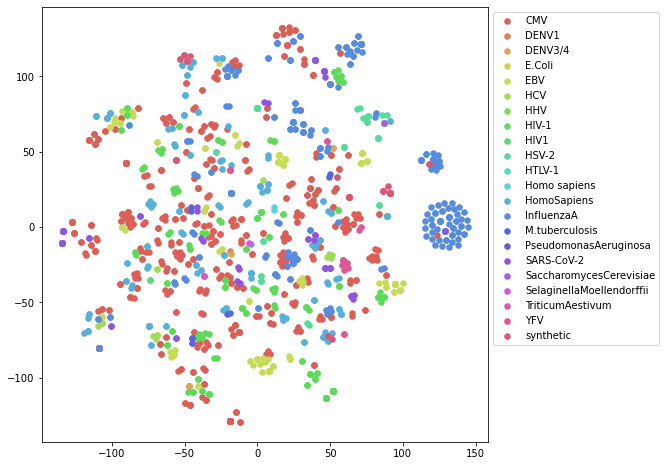

In [80]:
# The t-SNE dimension resuction result.
t_SNE_TCRs = TSNE(random_state=42)

# Do dimension resuction in TRA chain
# VDJ_test = Processed_TRA_by_GIANA
# TRA_epitope_label = VDJ_test['V6']
# TRA_epitope_label = pd.Categorical(TRA_epitope_label).codes
# TRA_spec_label_rep = pd.DataFrame({"antitope":Processed_TRA_by_GIANA['V6'], "label":TRA_epitope_label_rep})
# TRA_spec_label = TRA_spec_label_rep.drop_duplicates(keep='first')
# TRA_spec_label = TRA_spec_label.sort_values("label")
# display(TRA_spec_label)
TRA_spec_label, epitope = label_gen(Processed_TRA_by_GIANA)


TRA_t_SNE_fit= t_SNE_TCRs.fit_transform(Distance_Matrix_TRA_by_GIANA_array)
draw_scatter(epitope, TRA_t_SNE_fit, TRA_spec_label)
#plt.scatter(TRA_t_SNE_fit[:,0], TRA_t_SNE_fit[:,1], c=TRA_epitope_label)

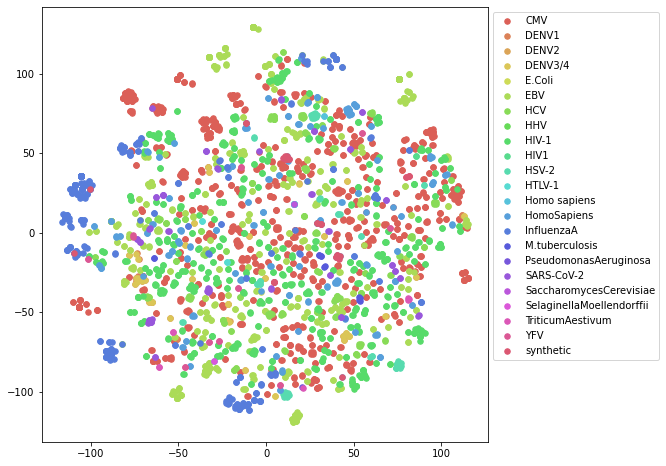

In [81]:
# The t-SNE dimension resuction result.
t_SNE_TCRs = TSNE(random_state=42, perplexity=20)

# Do dimension resuction in TRB chain
# VDJ_test = Processed_TRB_by_GIANA
# TRB_epitope_label = VDJ_test['V5']
# TRB_epitope_label = pd.Categorical(TRB_epitope_label).codes
TRB_spec_label, epitope = label_gen(Processed_TRB_by_GIANA)

TRB_t_SNE_fit= t_SNE_TCRs.fit_transform(Distance_Matrix_TRB_by_GIANA_array)

draw_scatter(epitope, TRB_t_SNE_fit, TRB_spec_label)
#plt.scatter(TRB_t_SNE_fit[:,0], TRB_t_SNE_fit[:,1], c=TRB_epitope_label)

D:\Anaconda Python\lib\site-packages\sklearn\manifold\_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


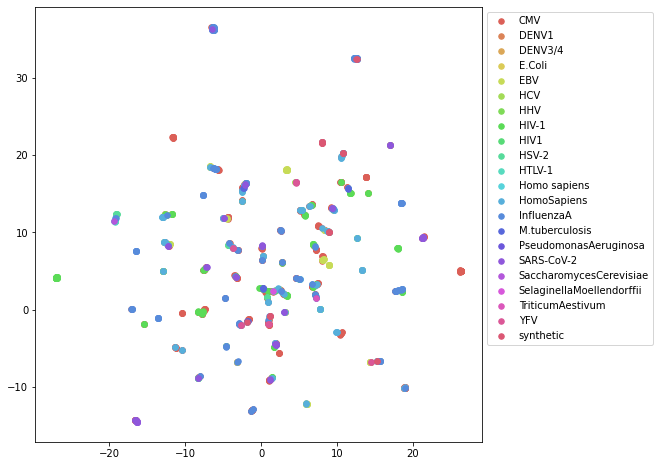

In [82]:
# The UMAP dimension resuction result.
umap_TCRs = umap.UMAP(random_state=42, n_components=2)

# Do dimension resuction in TRB chain
# VDJ_test = Processed_TRA_by_GIANA
# TRA_epitope_label = VDJ_test['V5']
# TRA_epitope_label = pd.Categorical(TRA_epitope_label).codes
#print(TRA_epitope_label)
TRA_spec_label, epitope = label_gen(Processed_TRA_by_GIANA)

TRA_umap_fit = umap_TCRs.fit_transform(Distance_Matrix_TRA_by_GIANA_array)

draw_scatter(epitope, TRA_umap_fit, TRA_spec_label)
#plt.scatter(TRA_umap_fit[:,0], TRA_umap_fit[:,1], c=TRA_epitope_label)

D:\Anaconda Python\lib\site-packages\sklearn\manifold\_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


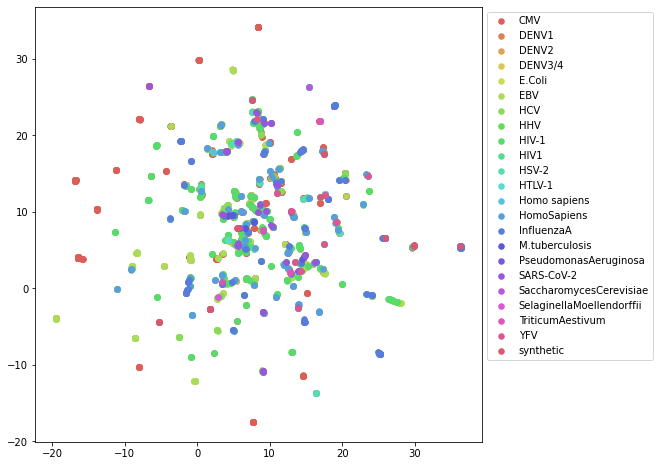

In [85]:
# The UMAP dimension resuction result.
umap_TCRs = umap.UMAP(random_state=42, n_components=2)

# Do dimension resuction in TRB chain
# VDJ_test = Processed_TRB_by_GIANA
# TRB_epitope_label = VDJ_test['V5']
# TRB_epitope_label = pd.Categorical(TRB_epitope_label).codes

TRB_spec_label, epitope = label_gen(Processed_TRB_by_GIANA)

TRB_umap_fit = umap_TCRs.fit_transform(Distance_Matrix_TRB_by_GIANA_array)

draw_scatter(epitope, TRB_umap_fit, TRB_spec_label)
#plt.scatter(TRB_umap_fit[:,0], TRB_umap_fit[:,1], c=TRB_epitope_label)

### Cluster

In [87]:
# To code the label species

TRA_epitope_label = Processed_TRA_by_GIANA['V6']
TRA_epitope_label_rep = pd.Categorical(TRA_epitope_label).codes

TRA_epitope_label = list(set(TRA_epitope_label_rep))
TRA_labels_len = len(TRA_epitope_label)


In [88]:
# TRA_epitope_label = Processed_TRA_by_GIANA['V5']
# TRA_epitope_label_rep = pd.Categorical(TRA_epitope_label).codes

# TRA_epitope_label = list(set(TRA_epitope_label_rep))
# TRA_labels_len = len(TRA_epitope_label)

In [89]:
# To code the label species
TRB_epitope_label = Processed_TRB_by_GIANA['V6']
TRB_epitope_label_rep = pd.Categorical(TRB_epitope_label).codes

TRB_epitope_label = list(set(TRB_epitope_label_rep))
TRB_labels_len = len(TRB_epitope_label)

In [90]:
# TRB_epitope_label = Processed_TRB_by_GIANA['V5']
# TRB_epitope_label_rep = pd.Categorical(TRB_epitope_label).codes

# TRB_epitope_label = list(set(TRB_epitope_label_rep))
# TRB_labels_len = len(TRB_epitope_label)

In [91]:
# To drop all repeat result and keep unique one
TRB_spec_label_rep = pd.DataFrame({"antitope":Processed_TRB_by_GIANA['V6'], "label":TRB_epitope_label_rep})
TRB_spec_label = TRB_spec_label_rep.drop_duplicates(keep='first')
display(TRB_spec_label)

TRA_spec_label_rep = pd.DataFrame({"antitope":Processed_TRA_by_GIANA['V6'], "label":TRA_epitope_label_rep})
TRA_spec_label = TRA_spec_label_rep.drop_duplicates(keep='first')
display(TRA_spec_label)

,antitope,label
0,HIV-1,8
6,CMV,0
24,SARS-CoV-2,17
28,synthetic,22
33,HomoSapiens,13
44,InfluenzaA,14
53,HCV,6
76,EBV,5
105,HSV-2,10
150,YFV,21


,antitope,label
0,InfluenzaA,13
2,CMV,0
9,HomoSapiens,12
11,HHV,6
18,HIV-1,7
23,SARS-CoV-2,16
29,synthetic,21
87,HSV-2,9
120,DENV1,1
121,DENV3/4,2


In [ ]:
# TRB_spec_label_rep = pd.DataFrame({"antitope":Processed_TRB_by_GIANA['V5'], "label":TRB_epitope_label_rep})
# TRB_spec_label = TRB_spec_label_rep.drop_duplicates(keep='first')
# display(TRB_spec_label)

# TRA_spec_label_rep = pd.DataFrame({"antitope":Processed_TRA_by_GIANA['V5'], "label":TRA_epitope_label_rep})
# TRA_spec_label = TRA_spec_label_rep.drop_duplicates(keep='first')

In [92]:

TRA_Kmeans_cluster= cluster.KMeans(n_clusters = TRA_labels_len, random_state = 42)
TRA_cluster_labels = TRA_Kmeans_cluster.fit_predict(TRA_umap_fit)
print(TRA_cluster_labels)

D:\Anaconda Python\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Anaconda Python\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


[14 14  9 ... 17  9  9]


In [93]:
TRB_Kmeans_cluster= cluster.KMeans(n_clusters = TRB_labels_len, random_state = 42)
TRB_cluster_labels = TRB_Kmeans_cluster.fit_predict(TRB_umap_fit)
print(TRB_cluster_labels)

[10 10 10 ... 11  4  4]


D:\Anaconda Python\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [94]:
TRA_Kmeans_cluster_TSNE= cluster.KMeans(n_clusters = TRA_labels_len, random_state = 42)
TRA_cluster_labels_TSNE = TRA_Kmeans_cluster.fit_predict(TRA_t_SNE_fit)
print(TRA_cluster_labels_TSNE)

[ 1  1 11 ... 16 18 18]


D:\Anaconda Python\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Anaconda Python\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


In [95]:
TRB_Kmeans_cluster_TSNE= cluster.KMeans(n_clusters = TRB_labels_len, random_state = 42)
TRB_cluster_labels_TSNE = TRB_Kmeans_cluster.fit_predict(TRB_t_SNE_fit)
print(TRB_cluster_labels_TSNE)

[22 22  8 ...  9 13 13]


D:\Anaconda Python\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [96]:
from pynndescent.utils import seed
import randomcolor
import random

random.seed(10)
color_TRA = {}
for c in set(TRA_cluster_labels):
  color_TRA[c] = '#' + hex(random.randint(16, 255))[2:4] + hex(random.randint(16, 255))[2:4] + hex(random.randint(16, 255))[2:4]

color_TRB = {}
for c in set(TRB_cluster_labels):
  color_TRB[c] = '#' + hex(random.randint(16, 255))[2:4] + hex(random.randint(16, 255))[2:4] + hex(random.randint(16, 255))[2:4]

for c in set(TRA_cluster_labels_TSNE):
  color_TRA[c] = '#' + hex(random.randint(16, 255))[2:4] + hex(random.randint(16, 255))[2:4] + hex(random.randint(16, 255))[2:4]

color_TRB = {}
for c in set(TRB_cluster_labels_TSNE):
  color_TRB[c] = '#' + hex(random.randint(16, 255))[2:4] + hex(random.randint(16, 255))[2:4] + hex(random.randint(16, 255))[2:4]





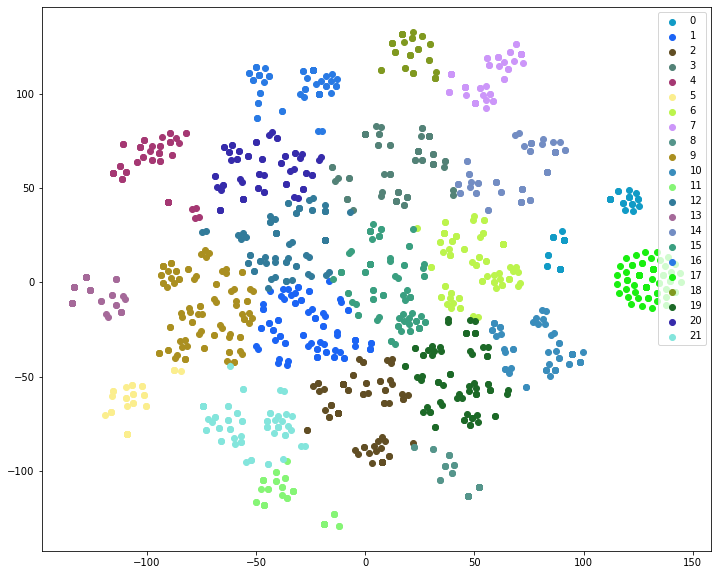

In [97]:
plt.figure(figsize=(12,10))
for label in set(TRA_cluster_labels_TSNE):
    plt.scatter(TRA_t_SNE_fit[TRA_cluster_labels_TSNE == label ,0], 
              TRA_t_SNE_fit[TRA_cluster_labels_TSNE == label,1], c=color_TRA[label], label=label)
plt.legend()
plt.show()

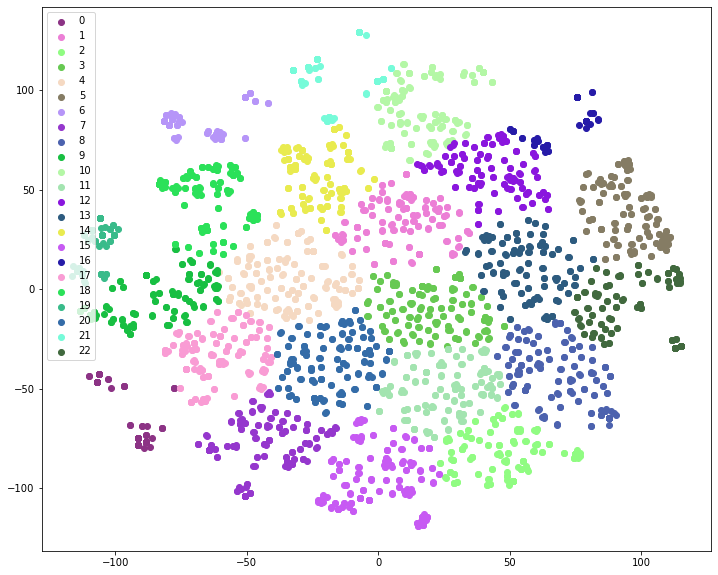

In [98]:
plt.figure(figsize=(12,10))
for label in set(TRB_cluster_labels_TSNE):
    plt.scatter(TRB_t_SNE_fit[TRB_cluster_labels_TSNE == label ,0], 
              TRB_t_SNE_fit[TRB_cluster_labels_TSNE == label,1], c=color_TRB[label], label=label)
plt.legend()
plt.show()

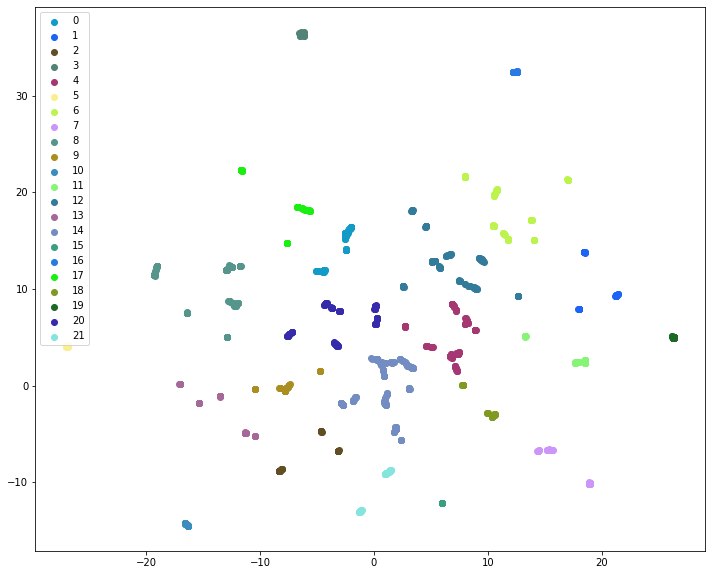

In [99]:
plt.figure(figsize=(12,10))
for label in set(TRA_cluster_labels):
    plt.scatter(TRA_umap_fit[TRA_cluster_labels == label ,0], 
              TRA_umap_fit[TRA_cluster_labels == label,1], c=color_TRA[label], label=label)
plt.legend()
plt.show()

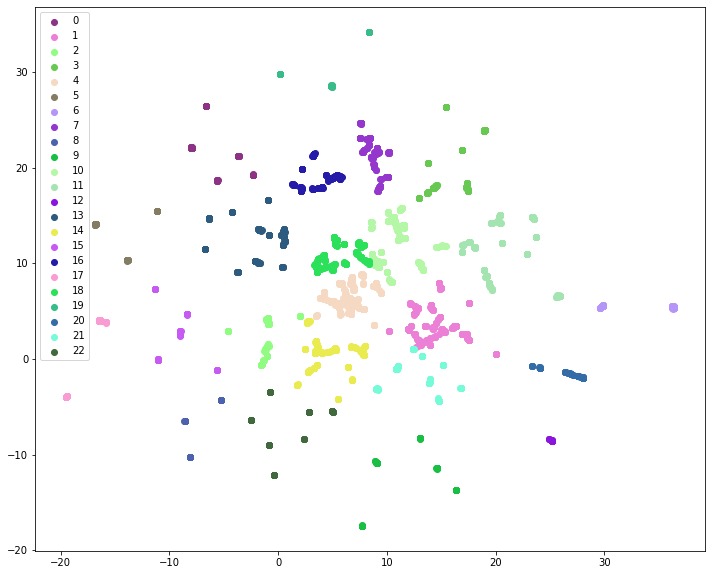

In [100]:
plt.figure(figsize=(12,10))
for label in set(TRB_cluster_labels):
    plt.scatter(TRB_umap_fit[TRB_cluster_labels == label ,0], 
              TRB_umap_fit[TRB_cluster_labels == label,1], c=color_TRB[label], label=label)
plt.legend()
plt.show()

In [101]:
print("TRA_UMAP: \n")
for l in set(TRA_cluster_labels):
  label_index = np.where(TRA_cluster_labels == l)
  label_index = np.array(label_index).flatten()
  #print(label_index)
  TRA_label_repeat = TRA_spec_label_rep.loc[label_index,:]
  TRA_label_repeat = TRA_label_repeat["antitope"]
  count = dict(Counter(TRA_label_repeat))
  print(count)

print("TRB_UMAP: \n")
for l in set(TRA_cluster_labels):
  label_index = np.where(TRA_cluster_labels == l)
  label_index = np.array(label_index).flatten()
  #print(label_index)
  TRA_label_repeat = TRA_spec_label_rep.loc[label_index,:]
  TRA_label_repeat = TRA_label_repeat["antitope"]
  count = dict(Counter(TRA_label_repeat))
  print(count)

print("TRA_TSNE: \n")
for l in set(TRA_cluster_labels_TSNE):
  label_index = np.where(TRA_cluster_labels_TSNE == l)
  label_index = np.array(label_index).flatten()
  #print(label_index)
  TRA_label_repeat = TRA_spec_label_rep.loc[label_index,:]
  TRA_label_repeat = TRA_label_repeat["antitope"]
  count = dict(Counter(TRA_label_repeat))
  print(count)

print("TRB_TSNE: \n")
for l in set(TRB_cluster_labels_TSNE):
  label_index = np.where(TRB_cluster_labels_TSNE == l)
  label_index = np.array(label_index).flatten()
  #print(label_index)
  TRB_label_repeat = TRB_spec_label_rep.loc[label_index,:]
  TRB_label_repeat = TRB_label_repeat["antitope"]
  count = dict(Counter(TRB_label_repeat))
  print(count)

TRA_UMAP: 

{'SARS-CoV-2': 4, 'InfluenzaA': 12, 'HomoSapiens': 11, 'CMV': 38, 'EBV': 5, 'M.tuberculosis': 2, 'HIV-1': 2, 'Homo sapiens': 1}
{'HIV-1': 11, 'InfluenzaA': 16, 'SARS-CoV-2': 13, 'CMV': 8}
{'InfluenzaA': 7, 'CMV': 10, 'SARS-CoV-2': 2, 'HSV-2': 16, 'EBV': 4}
{'InfluenzaA': 65, 'SARS-CoV-2': 1, 'CMV': 2}
{'InfluenzaA': 12, 'CMV': 57, 'HomoSapiens': 6, 'HIV-1': 18, 'EBV': 24, 'Homo sapiens': 2, 'TriticumAestivum': 1, 'PseudomonasAeruginosa': 1}
{'HIV-1': 37}
{'HomoSapiens': 20, 'M.tuberculosis': 2, 'HCV': 5, 'CMV': 35, 'SARS-CoV-2': 5, 'synthetic': 18, 'EBV': 2, 'HIV-1': 14, 'DENV1': 2, 'DENV3/4': 2}
{'HomoSapiens': 15, 'CMV': 34, 'InfluenzaA': 5, 'synthetic': 2, 'EBV': 13, 'YFV': 2}
{'CMV': 18, 'HomoSapiens': 23, 'HTLV-1': 11, 'SaccharomycesCerevisiae': 1, 'HIV-1': 17, 'InfluenzaA': 14, 'HSV-2': 19, 'SARS-CoV-2': 2, 'EBV': 15, 'HCV': 4}
{'CMV': 29, 'EBV': 2, 'HIV-1': 8, 'InfluenzaA': 5}
{'CMV': 14, 'SARS-CoV-2': 20}
{'EBV': 2, 'HomoSapiens': 8, 'HCV': 2, 'CMV': 2, 'InfluenzaA'